In [6]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer #simulator framework for qiskit
from matplotlib import style
style.use("classic")
%matplotlib inline

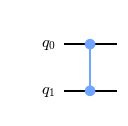

In [42]:
# oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)
oracle.to_gate()
oracle.draw('mpl')

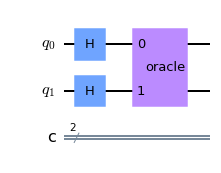

In [15]:
grover_circuit = QuantumCircuit(2, 2)
grover_circuit.h([0, 1])
grover_circuit.append(oracle, [0, 1])
grover_circuit.draw('mpl')

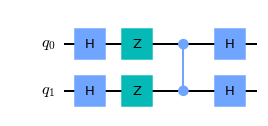

In [14]:
# reflection circuit
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])
reflection.to_gate()
reflection.draw('mpl')

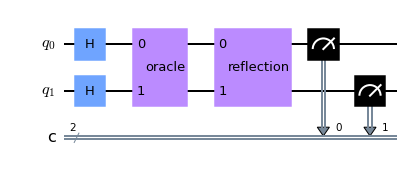

In [47]:
backend = Aer.get_backend("aer_simulator")
grover_circuit = QuantumCircuit(2, 2)
grover_circuit.h([0, 1])
grover_circuit.append(oracle, [0, 1])
grover_circuit.append(reflection, [0, 1])
grover_circuit.measure([0, 1], [0, 1])
grover_circuit.draw('mpl')


In [48]:
job = q.execute(grover_circuit, backend, shots=1)
result=job.result()
result.get_counts()

{'11': 1}